In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from datetime import datetime

In [2]:
news_data = pd.read_csv('news_categ.csv')
news_data.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0.000035,0.000314,0.000140,0.000070,0.000070,0.000140,0.000140,0.000210,0.000140,0.000140,0.000210,0.000105,0.000105,0.000000,0.000140,0.000000,0.000559,2019-06-01
1,1,0.000070,0.000070,0.000140,0.000175,0.000035,0.000070,0.000314,0.000175,0.000175,0.000000,0.000210,0.000070,0.000105,0.000070,0.000175,0.000210,0.000140,2020-01-06
2,2,0.000070,0.000175,0.000105,0.000070,0.000000,0.000105,0.000070,0.000070,0.000035,0.000035,0.000105,0.000105,0.000070,0.000070,0.000140,0.000210,0.000210,2019-12-29
3,3,0.000035,0.000140,0.000000,0.000070,0.000210,0.000035,0.000070,0.000000,0.000140,0.000140,0.000105,0.000000,0.000244,0.000035,0.000140,0.000105,0.000175,2019-12-15
4,4,0.000140,0.000035,0.000244,0.000070,0.000105,0.000105,0.000140,0.000140,0.000105,0.000244,0.000105,0.000105,0.000175,0.000070,0.000035,0.000070,0.000244,2019-08-13


In [3]:
stock_data = pd.read_excel('Stock_data.xlsx')
stock_data

,Dates,PX_HIGH,PX_CLOSE_1D,PX_VOLUME,PX_LOW,PX_OPEN,Unnamed: 6
0,2010-01-04,5238.45,5201.05,148652400,5167.10,5200.90,5200.00
1,2010-01-05,5288.35,5232.20,240844400,5242.40,5277.15,5200.90
2,2010-01-06,5310.85,5277.90,216147800,5260.05,5278.15,5277.15
3,2010-01-07,5302.55,5281.80,181246700,5244.75,5281.80,5278.15
4,2010-01-08,5276.75,5263.10,201910800,5234.70,5264.25,5281.80
...,...,...,...,...,...,...,...
2629,2020-01-31,12103.55,12035.80,771278258,11945.85,12100.40,12147.75
2630,2020-02-03,11749.85,11661.85,669815788,11614.50,11627.45,12100.40
2631,2020-02-04,11986.15,11707.90,560430291,11783.40,11786.25,11627.45
2632,2020-02-05,12098.15,11979.65,758032580,11953.35,12005.85,11786.25


### Ensuring the formatting of Date column is same for both Dataframes

In [4]:
for i in range(news_data.shape[0]):
    news_data.iloc[i,-1] = datetime.strptime(news_data.iloc[i,-1], '%Y-%m-%d').strftime('%m/%d/%y')

In [5]:
for i in range(stock_data.shape[0]):
    stock_data.iloc[i,0] = datetime.strptime(str(stock_data.iloc[i,0]), '%Y-%m-%d %H:%M:%S').strftime('%m/%d/%y')

### Creating the final dataset

In [6]:
df = []
Y = []
for i in range(stock_data.shape[0]):
    for j in range(news_data.shape[0]):
        
        if(news_data.iloc[j,-1]==stock_data.iloc[i,0]):
            
            #print(news_data.iloc[j,-1])
            
            z = list(stock_data.iloc[i,:]) + list(news_data.iloc[j,:-1])
            
            #Y.append(stock_data.iloc[i+1,2])
            
            #Y.append(1 if (stock_data.iloc[i+1,2] >= stock_data.iloc[i,2]) else 0)
            
            Y.append(1 if (stock_data.iloc[i+1,2] >= stock_data.iloc[i,2]) else 0)
            
            df.append(z)
        

In [7]:
df = pd.DataFrame(df)
df.shape

(169, 20)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,01/01/19,10923.60,10862.55,159404542,10807.10,10881.70,10913.20,200,0.000492,0.000000,0.000307,0.000184,0.000430,0.000430,0.000492,0.000246,0.000184,0.000430,0.000184,0.000246
1,01/02/19,10895.35,10910.10,309665939,10735.05,10868.85,10881.70,151,0.000430,0.000123,0.000184,0.000369,0.000184,0.000553,0.000737,0.000246,0.000369,0.000369,0.000123,0.000184
2,01/03/19,10814.05,10792.50,286241745,10661.25,10796.80,10868.85,88,0.000799,0.000184,0.000369,0.000676,0.000123,0.000676,0.000492,0.000246,0.000307,0.000369,0.000307,0.000123
3,01/04/19,10741.05,10672.25,296596655,10628.65,10699.70,10796.80,188,0.000184,0.000492,0.000369,0.000492,0.000000,0.000492,0.000799,0.000553,0.000307,0.000061,0.000123,0.000307
4,01/07/19,10835.95,10727.35,269371080,10750.15,10804.85,10699.70,81,0.000922,0.000246,0.000430,0.000184,0.000061,0.000246,0.000615,0.000430,0.000246,0.000553,0.000184,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,12/03/19,12068.60,12048.20,605789334,11956.40,12067.65,12137.05,202,0.000123,0.000492,0.000430,0.000492,0.000307,0.000615,0.000430,0.000246,0.000184,0.000430,0.000061,0.000000
165,12/04/19,12054.70,11994.20,747193818,11935.30,11969.95,12067.65,89,0.000369,0.000492,0.000615,0.000615,0.000430,0.000553,0.000615,0.000246,0.000307,0.000184,0.000061,0.000307
166,12/05/19,12081.20,12043.20,562228745,11998.75,12071.25,11969.95,114,0.000369,0.000307,0.000246,0.000307,0.000184,0.000430,0.000615,0.000123,0.000492,0.000307,0.000061,0.000061
167,12/06/19,12057.05,12018.40,609221205,11888.85,12047.35,12071.25,57,0.000492,0.000492,0.000184,0.000430,0.000553,0.000615,0.000492,0.000184,0.000307,0.000184,0.000123,0.000184


In [9]:
pd.DataFrame(Y).head(5)

,0
0,1
1,0
2,0
3,1
4,1


In [10]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)

In [12]:
X = np.array(df.iloc[:,1:])

Y = np.array(Y)
Y = Y.reshape(Y.size,1)

acc = []

for j in range(40,len(X) - 40,20):
    
    n_train_hours = j
    
    
    s=0
    z = 0

    for i in range(len(X) - n_train_hours - 1):

        #print(i)

        train_X = X[0:(i+ n_train_hours + 1), :]
        train_y = Y[0:(i+ n_train_hours + 1), :]
        test_X = X[(i+ n_train_hours + 1):(i+ n_train_hours + 3), :]
        test_y = Y[(i+ n_train_hours + 1):(i+ n_train_hours + 3), :]


        sc = StandardScaler()
        train_X = sc.fit_transform(train_X)
        test_X = sc.transform(test_X)

        regressor = RandomForestRegressor(n_estimators=20, random_state=0)
        regressor.fit(train_X, train_y)
        y_pred = regressor.predict(test_X)

        z += 1

        if((y_pred>=0.5).astype(int)[0]==test_y[0]):
            s += 1


    #print(s)

    #print(z)

    acc.append((s/z)*100)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

In [13]:
X = np.array(df.iloc[:,1:7])

Y = np.array(Y)
Y = Y.reshape(Y.size,1)

acc1 = []

for j in range(40,len(X) - 40,20):
    
    n_train_hours = j
    
    
    s=0
    z = 0

    for i in range(len(X) - n_train_hours - 1):

        #print(i)

        train_X = X[0:(i+ n_train_hours + 1), :]
        train_y = Y[0:(i+ n_train_hours + 1), :]
        test_X = X[(i+ n_train_hours + 1):(i+ n_train_hours + 3), :]
        test_y = Y[(i+ n_train_hours + 1):(i+ n_train_hours + 3), :]


        sc = StandardScaler()
        train_X = sc.fit_transform(train_X)
        test_X = sc.transform(test_X)

        regressor = RandomForestRegressor(n_estimators=20, random_state=0)
        regressor.fit(train_X, train_y)
        y_pred = regressor.predict(test_X)

        z += 1

        if((y_pred>=0.5).astype(int)[0]==test_y[0]):
            s += 1


    #print(s)

    #print(z)

    acc1.append((s/z)*100)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vec

In [14]:
acc

[42.1875,
 39.81481481481482,
 40.909090909090914,
 45.588235294117645,
 39.58333333333333]

In [15]:
acc1

[50.78125,
 51.85185185185185,
 54.54545454545454,
 60.29411764705882,
 60.416666666666664]

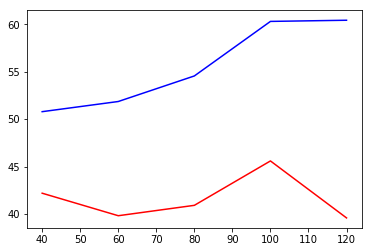

In [16]:
plt.plot(range(40,len(X) - 40,20),acc1,c='blue')
plt.plot(range(40,len(X) - 40,20),acc,c='red')